In [1]:
import os
import zipfile

# local_zip = '/tmp/rps.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

# local_zip = '/tmp/rps-test-set.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

In [3]:
apple_dir = os.path.join('./Training/apple/')
mango_dir = os.path.join('./Training/mango/')
orange_dir = os.path.join('./Training/orange/')
banana_dir = os.path.join('/Users/yuii/Downloads/fruit-recognition/Date/Banana')
# lemon_dir = os.path.join('/Users/yuii/Downloads/fruit-recognition-main/Date/lemon')



print('total training apple images:', len(os.listdir(apple_dir)))
print('total training mango images:', len(os.listdir(mango_dir)))
print('total training orange images:', len(os.listdir(orange_dir)))
print('total training banana images:', len(os.listdir(banana_dir)))
# print('total training lemon images:', len(os.listdir(lemon_dir)))


apple_files = os.listdir(apple_dir)
print(apple_files[:10])

mango_files = os.listdir(mango_dir)
print(mango_files[:10])

orange_files = os.listdir(orange_dir)
print(orange_files[:10])

banana_files = os.listdir(banana_dir)
# lemon_files = os.listdir(lemon_dir)


total training apple images: 193
total training mango images: 175
total training orange images: 235
total training banana images: 30
['apple1_82.jpg', 'apple1_41.jpg', 'apple1_69.jpg', 'apple2_1.jpg', 'apple2_38.jpg', 'apple2_10.jpg', 'apple3_87.jpg', 'apple3_50.jpg', 'apple3_44.jpg', 'apple3_78.jpg']
['mango2_13.jpg', 'mango3_47.jpg', 'mango3_84.jpg', 'mango3_52.jpg', 'mango3_46.jpg', 'mango1_57.jpg', 'mango1_43.jpg', 'mango2_12.jpg', 'mango2_10.jpg', 'mango2_3.jpg']
['orange1_42.jpg', 'orange1_56.jpg', 'orange1_2.jpg', 'orange2_13.jpg', 'orange4_72.jpg', 'orange3_47.jpg', 'orange3_46.jpg', 'orange3_91.jpg', 'orange3_85.jpg', 'orange2_12.jpg']


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 3

next_apple = [os.path.join(apple_dir, fname) 
                for fname in apple_files[pic_index-3:pic_index]]
next_mango = [os.path.join(mango_dir, fname) 
                for fname in mango_files[pic_index-3:pic_index]]
next_orange = [os.path.join(orange_dir, fname) 
                for fname in orange_files[pic_index-3:pic_index]]
next_banana = [os.path.join(banana_dir, fname)
                for fname in banana_files[:len(os.listdir(banana_dir))]]
# next_lemon = [os.path.join(lemon_dir, fname)
#                 for fname in lemon_files[:len(os.listdir(lemon_dir))]]




In [7]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# 定义训练数据的目录路径
TRAINING_DIR = "./Training/"

# 创建一个ImageDataGenerator对象，用于图像数据增强
training_datagen = ImageDataGenerator(
      # 将图像的每个像素值都除以255，使所有的像素值都在0到1之间
      rescale = 1./255,
      # 图像在进行随机旋转时，旋转角度的范围是0到20度
	  rotation_range=20,
      # 图像在进行随机平移时，水平方向上的最大平移距离是图像宽度的10%
      width_shift_range=0.1,
      # 图像在进行随机平移时，垂直方向上的最大平移距离是图像高度的10%
      height_shift_range=0.1,
      # 图像在进行随机剪切变换时，剪切角度的范围是0到0.2弧度
      shear_range=0.2,
      # 图像在进行随机缩放时，缩放比例的范围是[1-0.2, 1+0.2]
      zoom_range=0.2,
      # 图像可以进行随机水平翻转
      horizontal_flip=True,
      # 在进行以上变换时，如果产生了空白区域，使用最近的像素进行填充
      fill_mode='nearest')


train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(128,128),
	class_mode='categorical'
)

VALIDATION_DIR = "./Test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(128,128),
	class_mode='categorical'
)

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution

# #     tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
# #     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     # 512 neuron hidden layer
# #     tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])
model = tf.keras.models.Sequential([
    # 第一层卷积层，有16个过滤器，每个过滤器的大小为3x3，激活函数为ReLU函数
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    # 最大池化层，池化窗口的大小为2x2
    tf.keras.layers.MaxPooling2D(2,2),
    # 第二层卷积层，有32个过滤器，每个过滤器的大小为3x3，激活函数为ReLU函数
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # 最大池化层，池化窗口的大小为2x2
    tf.keras.layers.MaxPooling2D(2,2),
    # 第三层卷积层，有64个过滤器，每个过滤器的大小为3x3，激活函数为ReLU函数
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # 最大池化层，池化窗口的大小为2x2
    tf.keras.layers.MaxPooling2D(2,2),
    # 将上一层的多维输出展平为一维
    tf.keras.layers.Flatten(),
    # Dropout层，随机地在训练过程中忽略一部分神经元（这里是50%），以防止过拟合
    tf.keras.layers.Dropout(0.5),
    # 全连接层，有512个神经元，激活函数为ReLU函数
    tf.keras.layers.Dense(512, activation='relu'),
    # 输出层，有5个神经元，对应5个预测类别。激活函数为softmax，可以将输出转化为概率分布
    tf.keras.layers.Dense(4, activation='softmax')
])

# 打印模型的结构，包括模型的层次、输出形状和参数数量
model.summary()

# 配置模型的学习过程。其中，'categorical_crossentropy'表示使用分类交叉熵作为损失函数，
# 'adam'表示使用Adam优化器，['accuracy']表示在训练和测试过程中需要关注的指标是准确率
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型。其中，train_generator是训练数据生成器，epochs=25表示训练25轮，
# validation_data = validation_generator表示验证数据生成器，
# verbose = 1表示在训练过程中打印详细的日志信息
history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

# 保存训练好的模型，"model.h5"是保存模型的文件名
model.save("model.h5")


Found 633 images belonging to 4 classes.
Found 202 images belonging to 4 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,448,676 (24.60 MB)

 Trainable params: 6,448,676 (24.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


/Users/yuii/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.3668 - loss: 1.4255 - val_accuracy: 0.5545 - val_loss: 0.9738
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.6893 - loss: 0.7994 - val_accuracy: 0.7673 - val_loss: 0.5022
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.8594 - loss: 0.3203 - val_accuracy: 1.0000 - val_loss: 0.0856
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9945 - loss: 0.0796 - val_accuracy: 0.9901 - val_loss: 0.0325
Epoch 5/25
 7/20 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.9906 - loss: 0.0429

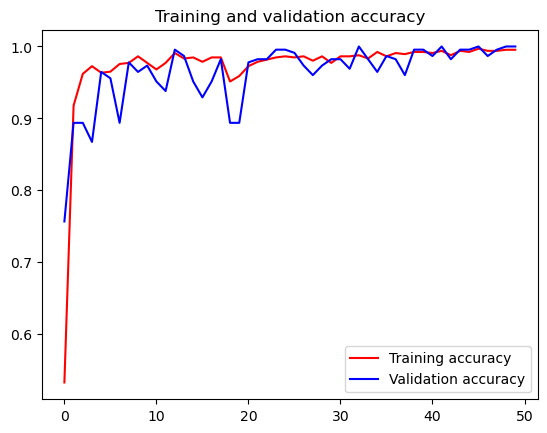

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt  # 导入matplotlib库的pyplot模块

acc = history.history['accuracy']  # 从训练历史中获取训练准确率
val_acc = history.history['val_accuracy']  # 从训练历史中获取验证准确率
loss = history.history['loss']  # 从训练历史中获取训练损失
val_loss = history.history['val_loss']  # 从训练历史中获取验证损失

epochs = range(len(acc))  # 创建一个与训练准确率长度相同的范围，用于作为x轴的值

plt.plot(epochs, acc, 'r', label='Training accuracy')  # 绘制训练准确率的图形
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # 绘制验证准确率的图形
plt.title('Training and validation accuracy')  # 设置图形的标题
plt.legend(loc=0)  # 添加图例
plt.figure()  # 创建一个新的图形窗口

plt.show()  # 显示图形


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0. 0. 1. 0. 0.]]
这是柠檬


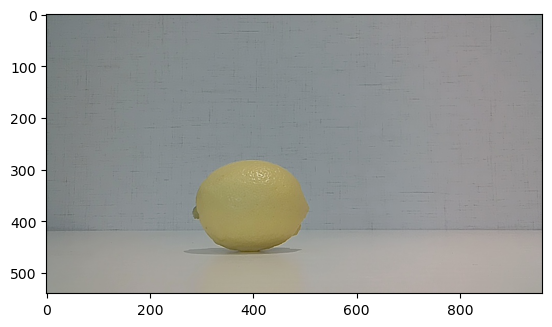

In [38]:
import numpy as np  # 导入NumPy库
import tensorflow as tf

from keras.preprocessing.image import load_img  # 从Keras的预处理模块中导入load_img函数
import matplotlib.pyplot as plt  # 导入Matplotlib库的pyplot模块
import matplotlib.image as mpimg  # 导入Matplotlib库的image模块

model= tf.keras.models.load_model('model.h5')  # 使用tf.keras.models.load_model函数加载训练好的模型
img_path = '/Users/yuii/Downloads/fruit-recognition-main/Test/lemon/147.jpg'
img = mpimg.imread(img_path)  # 使用imread函数读取图像文件
test_image = load_img(img_path , target_size=(128, 128))  # 使用load_img函数加载图像，并将图像的大小调整为128x128像素
test_image = np.expand_dims(test_image, axis=0)  # 使用np.expand_dims函数在图像数组的第一个维度上添加一个额外的维度
prediction = model.predict(test_image)  # 使用模型对图像进行预测
print(prediction)  # 打印出预测结果


fruit_labels = ['苹果',  '香蕉','芒果', '橙子']  # 定义一个列表，包含所有可能的水果类别
predicted_class_index = np.argmax(prediction)  # 使用np.argmax函数找到预测结果中概率最大的类别的索引
fruit_label = fruit_labels[predicted_class_index]  # 使用预测的类别索引从fruit_labels列表中获取对应的水果标签
print("这是" + fruit_label )  # 打印出预测的水果标签
plt.imshow(img)  # 使用imshow函数显示原始图像


In [27]:
import csv

with open('history.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
    for i in range(len(acc)):
        writer.writerow([acc[i], val_acc[i], loss[i], val_loss[i]])